In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

### Load the dataset

In [2]:
# read the dataset
df = pd.read_csv('../data/samples/sample.csv')
df.head()

,Unnamed: 0,id,storeId,storeName,title,rating,lunchTime,category,postCategory,sold,price,discount,shippingCost,imageUrl,storeUrl,category_name,category_id,type
0,689865,595700097,100271,Ningbo Chinwey Industrial CO. LTD,2W040-10 water electro-magnetic Valve normal c...,0.0,2008-09-28 00:00:00,NaN,1460,0,34.19,0,61.98,//ae01.alicdn.com/kf/HTB15gdAIXXXXXbdXXXXq6xXF...,//www.aliexpress.com/store/100271,plumbing,200217293,natural
1,515889,261170843,600128,Hangzhou Zhuo Yi Trading Co. Ltd.,640717 Utility Knives blade 9mm Art bl...,5.0,2009-10-15 00:00:00,NaN,2131,0,5.02,0,129.41,//ae01.alicdn.com/kf/HTB1tup0KFXXXXX.XVXXq6xXF...,//www.aliexpress.com/store/600128,cutting-supplies,100003819,natural
2,723991,262797022,600128,Hangzhou Zhuo Yi Trading Co. Ltd.,Guaranteed 100% Genuine HERO Fountain Pen (382...,0.0,2009-10-24 00:00:00,NaN,21110702,0,21.23,0,129.37,//ae01.alicdn.com/kf/HTB1hjaXKFXXXXc7XpXXq6xXF...,//www.aliexpress.com/store/600128,writing-correction-supplies,200003196,natural
3,327681,279947647,800877,Coxswain Official Store,TBD-GA-05525C Car LED Lightbar for Fire Truck ...,0.0,2010-01-07 00:00:00,NaN,301503,0,1316.66,5,2040.37,//ae01.alicdn.com/kf/HTB1zOECOVXXXXXzaFXXq6xXF...,//www.aliexpress.com/store/800877,roadway-safety,200216744,natural
4,852472,279878065,800877,Coxswain Official Store,Coxswain Amber Rotator Beacon for enginer car ...,0.0,2010-01-07 00:00:00,NaN,301503,1,124.70,10,0.00,//ae01.alicdn.com/kf/HTB1i66wOVXXXXXoapXXq6xXF...,//www.aliexpress.com/store/800877,roadway-safety,200216744,natural


## Clean data

In [3]:
# get a count of nan values
nan_counts = df.isna().sum()
print(nan_counts)

Unnamed: 0            0
id                    0
storeId               0
storeName             0
title                 0
rating                0
lunchTime             0
category         128779
postCategory          0
sold                  0
price                 0
discount              0
shippingCost      11145
imageUrl              0
storeUrl              0
category_name         0
category_id           0
type                  0
dtype: int64


#### Remove unnecessary columns
If we look at the table above we will see that we need to remove 'category' feature because it has only NaN values. We also need to remove Url-related features because they give no useful data for us. The id is a unique number for each instance of the table, so we are going to remove it as well

In [4]:
df = df.drop(columns=['category','imageUrl','storeUrl', 'id'])
df.head()

,Unnamed: 0,storeId,storeName,title,rating,lunchTime,postCategory,sold,price,discount,shippingCost,category_name,category_id,type
0,689865,100271,Ningbo Chinwey Industrial CO. LTD,2W040-10 water electro-magnetic Valve normal c...,0.0,2008-09-28 00:00:00,1460,0,34.19,0,61.98,plumbing,200217293,natural
1,515889,600128,Hangzhou Zhuo Yi Trading Co. Ltd.,640717 Utility Knives blade 9mm Art bl...,5.0,2009-10-15 00:00:00,2131,0,5.02,0,129.41,cutting-supplies,100003819,natural
2,723991,600128,Hangzhou Zhuo Yi Trading Co. Ltd.,Guaranteed 100% Genuine HERO Fountain Pen (382...,0.0,2009-10-24 00:00:00,21110702,0,21.23,0,129.37,writing-correction-supplies,200003196,natural
3,327681,800877,Coxswain Official Store,TBD-GA-05525C Car LED Lightbar for Fire Truck ...,0.0,2010-01-07 00:00:00,301503,0,1316.66,5,2040.37,roadway-safety,200216744,natural
4,852472,800877,Coxswain Official Store,Coxswain Amber Rotator Beacon for enginer car ...,0.0,2010-01-07 00:00:00,301503,1,124.70,10,0.00,roadway-safety,200216744,natural


In [5]:
# Translate the timestamp to year, month, and day
df['year'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').year)
df['month'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').month)
df['day'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').day)

# Drop the launch time column
df = df.drop(columns=['lunchTime'])

df.head()

,Unnamed: 0,storeId,storeName,title,rating,postCategory,sold,price,discount,shippingCost,category_name,category_id,type,year,month,day
0,689865,100271,Ningbo Chinwey Industrial CO. LTD,2W040-10 water electro-magnetic Valve normal c...,0.0,1460,0,34.19,0,61.98,plumbing,200217293,natural,2008,9,28
1,515889,600128,Hangzhou Zhuo Yi Trading Co. Ltd.,640717 Utility Knives blade 9mm Art bl...,5.0,2131,0,5.02,0,129.41,cutting-supplies,100003819,natural,2009,10,15
2,723991,600128,Hangzhou Zhuo Yi Trading Co. Ltd.,Guaranteed 100% Genuine HERO Fountain Pen (382...,0.0,21110702,0,21.23,0,129.37,writing-correction-supplies,200003196,natural,2009,10,24
3,327681,800877,Coxswain Official Store,TBD-GA-05525C Car LED Lightbar for Fire Truck ...,0.0,301503,0,1316.66,5,2040.37,roadway-safety,200216744,natural,2010,1,7
4,852472,800877,Coxswain Official Store,Coxswain Amber Rotator Beacon for enginer car ...,0.0,301503,1,124.70,10,0.00,roadway-safety,200216744,natural,2010,1,7


## Data description & exploration

In [6]:
df.describe()

,Unnamed: 0,storeId,rating,postCategory,sold,price,discount,shippingCost,category_id,year,month,day
count,128779.000000,1.287790e+05,128779.000000,1.287790e+05,128779.000000,128779.000000,128779.000000,117634.000000,1.287790e+05,128779.000000,128779.000000,128779.000000
mean,499620.773364,1.903098e+08,2.335528,1.207227e+08,99.642605,276.938288,22.322025,141.052785,1.400933e+08,2019.548622,6.177234,15.855605
std,241529.826833,3.671665e+08,2.404002,8.993626e+07,761.175488,4651.236266,19.115436,1782.235629,8.303631e+07,1.666750,3.249703,8.602091
min,39.000000,1.000300e+04,0.000000,1.450000e+02,0.000000,0.040000,0.000000,0.000000,5.000000e+00,2008.000000,1.000000,1.000000
25%,307243.500000,1.836695e+06,0.000000,3.612200e+05,0.000000,13.940000,0.000000,0.000000,1.000016e+08,2019.000000,4.000000,8.000000
50%,543978.000000,4.429203e+06,0.000000,2.000003e+08,2.000000,39.030000,20.000000,12.900000,2.000024e+08,2020.000000,6.000000,16.000000
75%,698346.500000,5.781718e+06,5.000000,2.000040e+08,20.000000,108.590000,37.000000,24.710000,2.002154e+08,2021.000000,9.000000,23.000000
max,864267.000000,9.126263e+08,5.000000,2.018986e+08,98610.000000,976428.200000,99.000000,98648.830000,2.060891e+08,2021.000000,12.000000,31.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128779 entries, 0 to 128778
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     128779 non-null  int64  
 1   storeId        128779 non-null  int64  
 2   storeName      128779 non-null  object 
 3   title          128779 non-null  object 
 4   rating         128779 non-null  float64
 5   postCategory   128779 non-null  int64  
 6   sold           128779 non-null  int64  
 7   price          128779 non-null  float64
 8   discount       128779 non-null  int64  
 9   shippingCost   117634 non-null  float64
 10  category_name  128779 non-null  object 
 11  category_id    128779 non-null  int64  
 12  type           128779 non-null  object 
 13  year           128779 non-null  int64  
 14  month          128779 non-null  int64  
 15  day            128779 non-null  int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 15.7+ MB


In [8]:
df.nunique()

Unnamed: 0       128779
storeId           34490
storeName         34501
title            126677
rating               37
postCategory       2488
sold               2772
price             23718
discount            100
shippingCost       7689
category_name       325
category_id         325
type                  2
year                 14
month                12
day                  31
dtype: int64

#### Categories of the features with description
- Text:
    - storeName: name of the store
    - title: description of the product
- Numerical:
    - rating: rating of the product from 0 to 5
    - sold: number of times the product was sold
    - price: price after applying the discount in SAR (1SAR ~= 0.27USD)
    - discount: discount percentage of the product Price in between 0-100
    - shippingCost: Shipping Cost to Saudi Arabia in SAR
- Categorical
    - postCategory: probably, related to delivery
    - category_name: category the product is in
    - category_id: id of the category
    - type: either ad (Advertised) or natural (not Advertised)
- Time
    - year
    - month
    - day
    

#### Data distribution (Bivariate analysis)

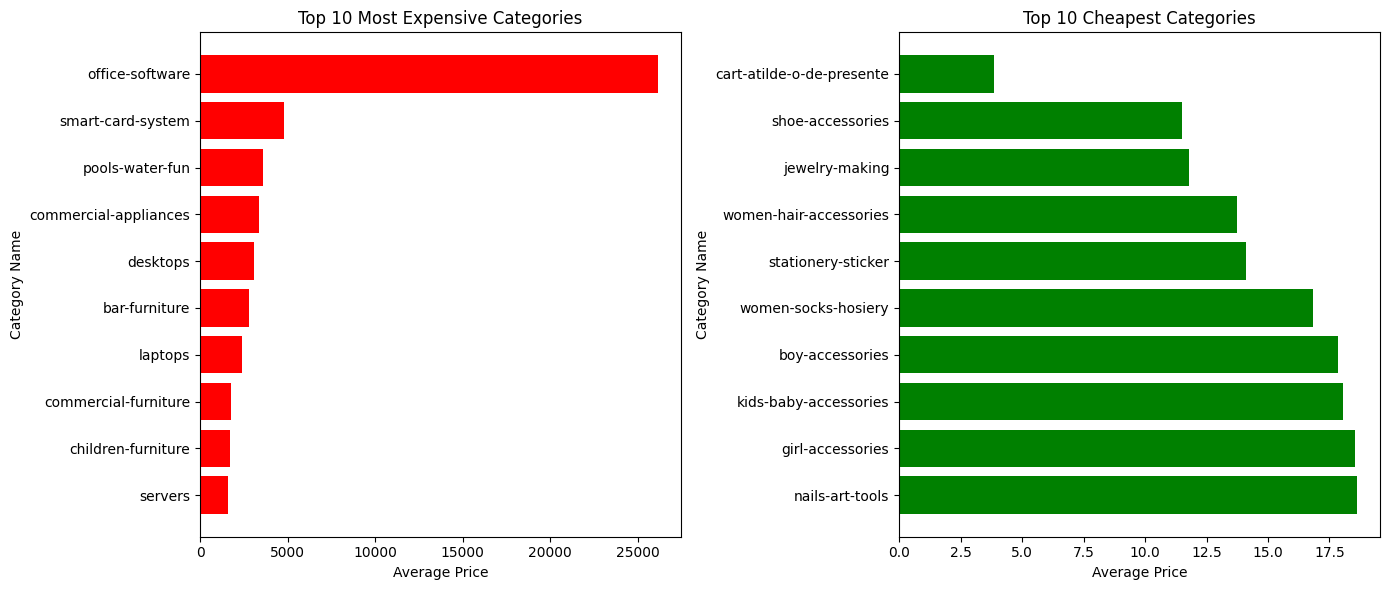

In [9]:
average_price = df.groupby('category_name')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['category_name'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Most Expensive Categories')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
plt.barh(cheapest['category_name'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Cheapest Categories')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

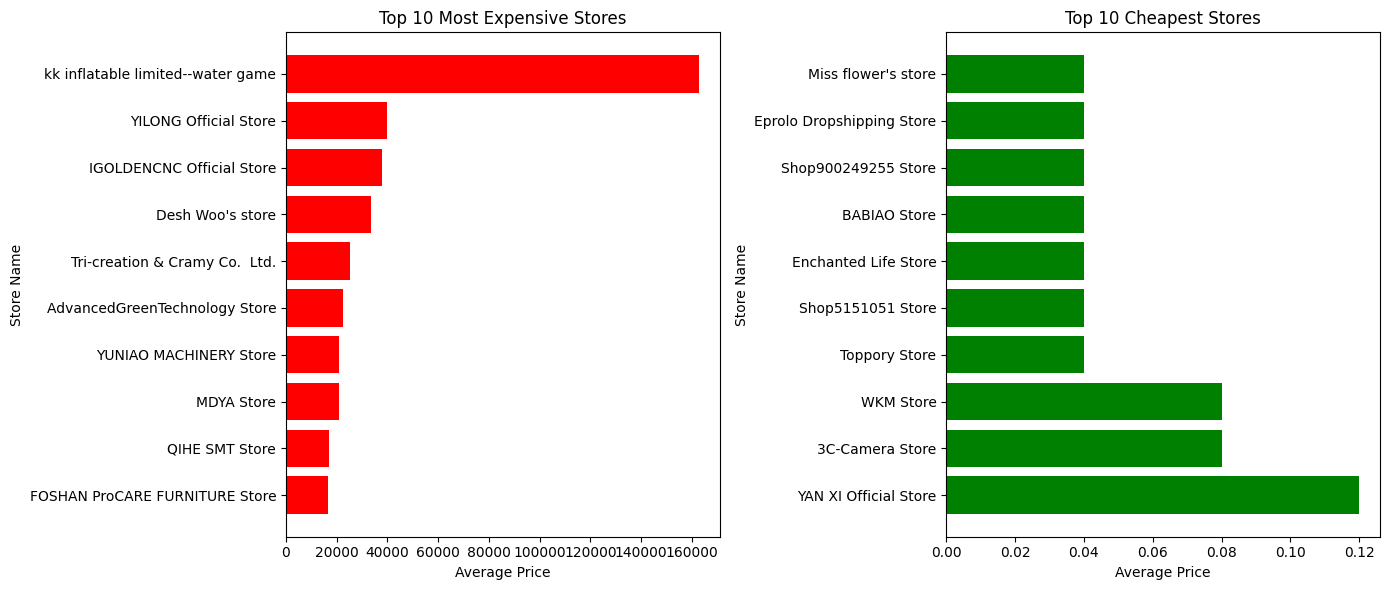

In [10]:
average_price = df.groupby('storeName')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['storeName'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Most Expensive Stores')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(cheapest['storeName'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Cheapest Stores')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

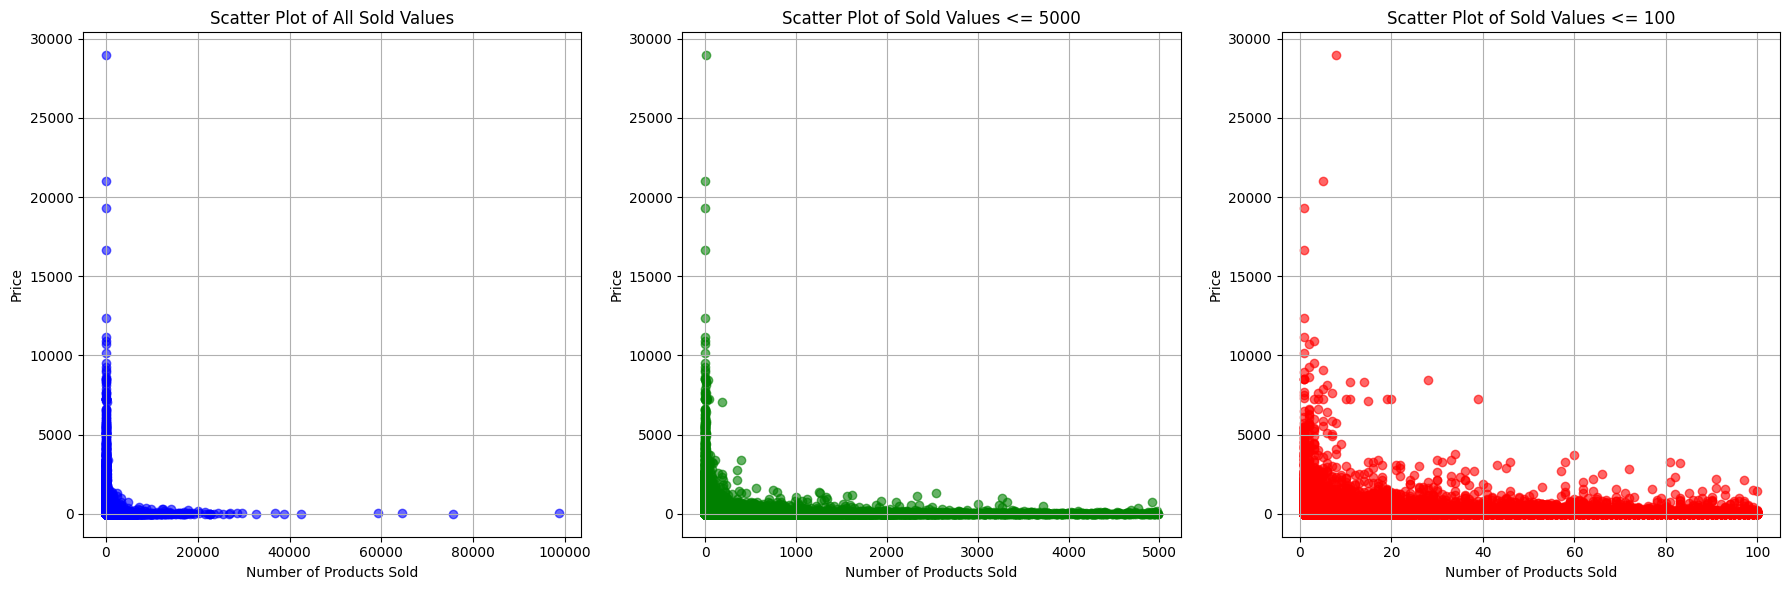

In [11]:
df_wo0 = df[df['sold'] != 0]

df_all = df_wo0
df_max_5000 = df_wo0[df_wo0['sold'] <= 5000]
df_max_100 = df_wo0[df_wo0['sold'] <= 100]
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_all['sold'], df_all['price'], color='blue', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of All Sold Values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(df_max_5000['sold'], df_max_5000['price'], color='green', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 5000')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(df_max_100['sold'], df_max_100['price'], color='red', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 100')
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

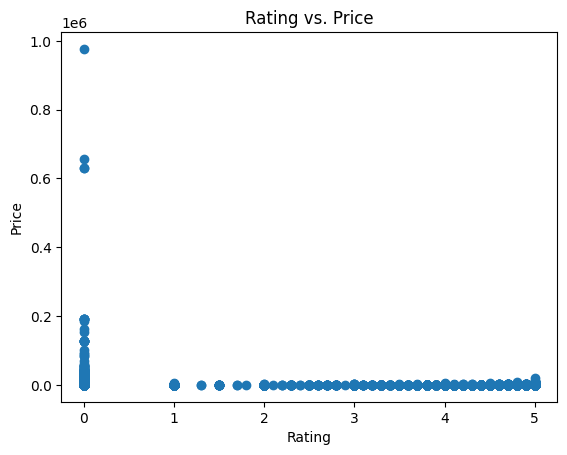

In [13]:
plt.scatter(df['rating'], df['price'])
plt.title("Rating vs. Price")
plt.xlabel("Rating")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

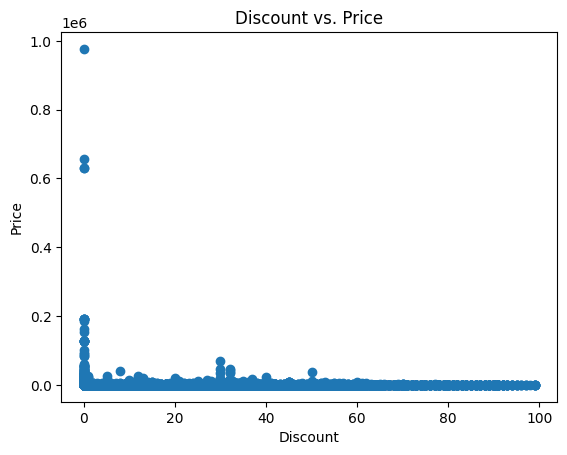

In [14]:
plt.scatter(df['discount'], df['price'])
plt.title("Discount vs. Price")
plt.xlabel("Discount")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

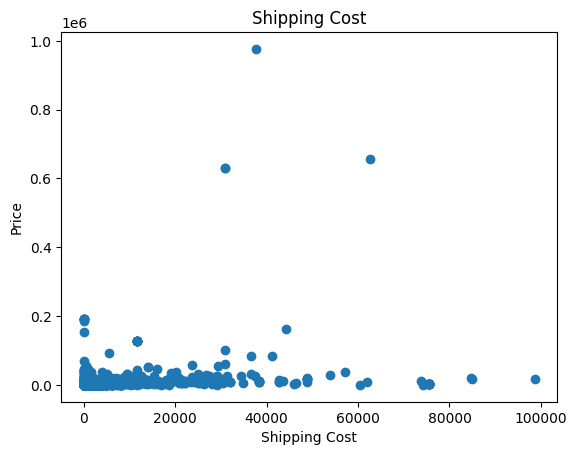

In [15]:
plt.scatter(df['shippingCost'], df['price'])
plt.title("Shipping Cost")
plt.xlabel("Shipping Cost")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

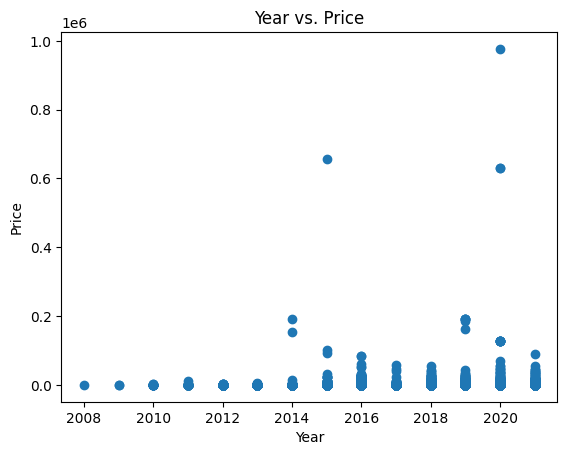

In [16]:
plt.scatter(df['year'], df['price'])
plt.title("Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")

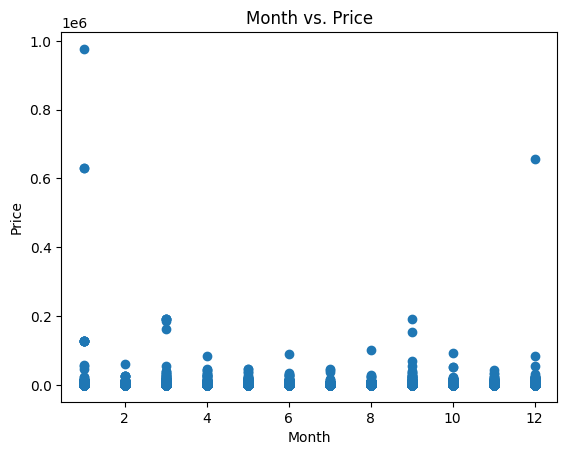

In [17]:
plt.scatter(df['month'], df['price'])
plt.title("Month vs. Price")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

#### Conclusion
We can see no linear relationships between the features and the target, it suggests that methods relying on linear assumptions might not perform well

Potentially useful methods could be:
- Decision Trees and Ensembles
- SVM
- MLP

Potentially not useful methods:
- Linear regression

Preliminary list of features which may contribute to the performance of the ML model:
- categoryName/categoryId (each category has exemplary price window)
- storeName/storeId (each store may work for different categories)
- sold (there are weak inverse correlation between number of solded items and price)
- year (there are weak correlation between year and price)
- title (keywords that will make narrow view of the product)

## Data quality verification

In [18]:
df.isnull().sum()

Unnamed: 0           0
storeId              0
storeName            0
title                0
rating               0
postCategory         0
sold                 0
price                0
discount             0
shippingCost     11145
category_name        0
category_id          0
type                 0
year                 0
month                0
day                  0
dtype: int64

In [19]:
# Let's impute the nan values in shippingCost with the mean value
mean_shipping_cost = df['shippingCost'].mean()
df.fillna({'shippingCost': mean_shipping_cost}, inplace=True)

In [20]:
# check the missing values again
df.isnull().sum()

Unnamed: 0       0
storeId          0
storeName        0
title            0
rating           0
postCategory     0
sold             0
price            0
discount         0
shippingCost     0
category_name    0
category_id      0
type             0
year             0
month            0
day              0
dtype: int64

## Preliminary data transformation

\------------------------IMPORTANT------------------

We select only items with sold > 10 and delete products from stores with general count of products < 5. Otherwise, the model does not converge, which shows that our data contains a lot of outliers 

In [40]:
df = df[(df['sold'] > 10) & (df['rating'] > 0)]
df = df[df['storeName'].map(df['storeName'].value_counts()) > 3]
df.shape

(10130, 16)

In [41]:
# perform train test split
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
X = X[['title', 'rating', 'sold', 'discount', 'shippingCost', 'year', 'month', 'category_name', 'type']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
df.head()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Column names
numerical_features = ['rating', 'sold', 'discount', 'shippingCost']
categorical_features = ['category_name', 'type', 'year', 'month']

# Define the transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply one-hot encoding
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        # ('text', text_transformer, text_features)
    ]
)

# Create the pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# transforming the data
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()

## POC

In [43]:
import torch
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [45]:
from transformers import RobertaTokenizer, RobertaModel
from tqdm import tqdm

class TextDataset(Dataset):
    def __init__(self, text_series):
        self.text_series = text_series

    def __len__(self):
        return len(self.text_series)

    def __getitem__(self, idx):
        return self.text_series.iloc[idx]

def collate_fn(batch):
    return tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=512)

def generate_embeddings(text_series, model, batch_size=512):
    # Create DataLoader
    dataset = TextDataset(text_series)
    dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn)

    embeddings_list = []

    # Generate embeddings in batches
    with torch.no_grad():
        for batch in tqdm(dataloader):
            torch.cuda.empty_cache()
            
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            embeddings = outputs.last_hidden_state.mean(dim=1).cpu()  # Take the mean of the last hidden states
            embeddings_list.append(embeddings)

    # Concatenate all batch embeddings
    embeddings = torch.cat(embeddings_list, dim=0)

    return embeddings

# Load pre-trained model
model_name = 'roberta-base'
model = RobertaModel.from_pretrained(model_name).to(device)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model.eval()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

In [46]:
# create embeddings for title feature
embeddings_train = generate_embeddings(X_train['title'], model)
embeddings_test = generate_embeddings(X_test['title'], model)

100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


In [47]:
embeddings_train.shape

torch.Size([8104, 768])

In [48]:
del model
torch.cuda.empty_cache()

In [49]:
train_batch_size = 32
test_batch_size = 32

X_train_transformed_tensor = torch.tensor(X_train_transformed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_transformed_tensor = torch.tensor(X_test_transformed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [50]:
X_train_tensor = torch.concat([X_train_transformed_tensor, embeddings_train], dim=1)
X_test_tensor = torch.concat([X_test_transformed_tensor, embeddings_test], dim=1)
X_train_tensor.shape

torch.Size([8104, 1094])

In [51]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [52]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input_size, 512), nn.ReLU())
        self.fc2 = nn.Sequential(nn.Linear(512, 64), nn.ReLU())
        self.fc3 = nn.Sequential(nn.Linear(64, 1))

    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


# Define the training function
def train_model(model, criterion, optimizer, dataloader, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.view(-1, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    return model



In [53]:
# Define the model, criterion, and optimizer
input_size = X_train_tensor.shape[1]

model = MLP(input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
model = train_model(model, criterion, optimizer, train_loader, num_epochs)


Epoch 1/100, Loss: 24761.3293
Epoch 2/100, Loss: 21459.7931
Epoch 3/100, Loss: 20329.1712
Epoch 4/100, Loss: 19596.1946
Epoch 5/100, Loss: 19040.2297
Epoch 6/100, Loss: 18582.6896
Epoch 7/100, Loss: 18105.9130
Epoch 8/100, Loss: 17787.1313
Epoch 9/100, Loss: 17333.5636
Epoch 10/100, Loss: 16891.0847
Epoch 11/100, Loss: 16763.1506
Epoch 12/100, Loss: 16553.8878
Epoch 13/100, Loss: 16214.4766
Epoch 14/100, Loss: 15894.8109
Epoch 15/100, Loss: 15652.9549
Epoch 16/100, Loss: 15408.5855
Epoch 17/100, Loss: 15129.0711
Epoch 18/100, Loss: 14806.2955
Epoch 19/100, Loss: 14715.5191
Epoch 20/100, Loss: 14319.1569
Epoch 21/100, Loss: 14046.1105
Epoch 22/100, Loss: 13868.0394
Epoch 23/100, Loss: 13698.3692
Epoch 24/100, Loss: 13402.6641
Epoch 25/100, Loss: 13163.1305
Epoch 26/100, Loss: 12804.6917
Epoch 27/100, Loss: 12562.3717
Epoch 28/100, Loss: 12379.6223
Epoch 29/100, Loss: 12073.2341
Epoch 30/100, Loss: 11978.6716
Epoch 31/100, Loss: 11754.4700
Epoch 32/100, Loss: 11448.1341
Epoch 33/100, Los

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            y_true.extend(labels.cpu().numpy())  # Convert labels to numpy array
            y_pred.extend(outputs.cpu().numpy())  # Convert predictions to numpy array

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    r2 = r2_score(y_true, y_pred)
    print(f'R^2 Score: {r2:.4f}')
    print(f'MSE Score: {mean_squared_error(y_true, y_pred):.4f}')
    print(f'MAE Score: {mean_absolute_error(y_true, y_pred):.4f}')

In [55]:
evaluate_model(model, test_loader)

R^2 Score: 0.2569
MSE Score: 47585.0664
MAE Score: 35.6109
